# Maxwell Model Report
## A model for Viscoelastic Materials
Below are the imported packages required for this jupyter notebook.

In [120]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cmath
from cmath import e
from numpy.lib.type_check import real
from scipy.optimize import curve_fit


## 1 Theory
This section will discuss the theoretical background of our experiment namely Visco-Elastic Materials and the model describing their behavior.

### 1.1 Viscoelasticity
Viscoelastic refers to the combined physical behavior of viscous and elastic forces in a material, such as a non-newtonian solid. A non-newtonian solid will behave elastic under quick-acting forces. However, under slow-acting forces the material will behave visous, resisting the force. The specific behavior that dominates is dependent on the time that the force is being applied. A material with this behavior can be described as a dashpot connected to a spring, seen in the figure below.

![](Mechanical%20analouge.png)

A dashpot, also known as a dampener, resists with a counterforce proportional to the velocity of its displacement. while a spring resists with a counterforce proportional to the magnitude of displacement. When placed together as shown in the figure above this mechanical system behaves much like a viscoelastic material. Where the force of resistance is dependent on the time the force is being applied, this can also be visualized with the figure above. If we were to apply a quick force from the right the spring would absorb and bounce back the dashpot would not have the time to move significantly. However, if we apply a long force the spring would compress and the dashpot would be providing the significant portion of the resistance.

For a dashpot the force equation would be:

$$ F = \eta \frac{dx}{dt} $$

For a spring the force equation, known as Hooke's Law, is:

$$ F = kx $$

Since these elements are conncected in series the force experienced by both remains the same however the displacement caused by the force would be different for each element. In an electrical circuit the analogy to force is the voltage drop over the system, U, whereas the analogy to displacement, x, is charge, Q.

For a resistor we have:

$$ U = RI = R\frac{dQ}{dt}$$

Which is analogous to the force equation of a dashpot, where the resistance, R, takes the constant $\eta$'s roll. For a capacitor we have:

$$ U = \frac{Q}{C}$$

This is analogous to Hooke's Law where the inverse capacitance takes the roll of the spring constant.

Seeing as the mechanical model of a viscoelastic material is connected in series it makes intuitive sense to place the circuit in series, however because the force experienced by both elements is the same yet the displacement is different the electrical equivilant must maintain the same voltage drop over both elements. According to Kirchoff's Circuit laws this requires the capacitor and resistor to be connected in parallel in the circuit. A representation of this circuit is shown in the figure below.


![](circuit.png)

### 1.2 A model for Viscoelastic Materials
Understanding the behavior of the electrical circuit gives us insight to how the mechanical model will behave. Specifically the Impedence, $ \hat{Z} $, which carrys information on both the magnitude and phase of a component must be understood. $\hat{Z}$ can be understood as the generalized resistance where the resistance is the real part of the impedence. This applys in a generalized ohms law, shown below.

$$ \~{U} = \hat{Z} \~I$$

Where $\~U = U_0 e^{i\omega t}e^{i\phi_U}$ and $\~I = I_0 e^{i\omega t}e^{i\phi_I}$ Therefore impedence can be understood as,

$$ \hat{Z} = \frac{U_0 e^{i\omega t}e^{i\phi_U}}{I_0 e^{i\omega t}e^{i \phi_I}} = \frac{U_0 e^{i\phi_U}}{I_0 e^{i \phi_I}}= \frac{U_0}{I_0} e^{i\phi_{U-I}}$$

For a resistor with phase difference, $\phi_{U-I} = 0$ the Impedence becomes the real part or,

$$R = \frac{U_0}{I_0}$$

For a capacitor the impedence can be found from the equation, $Q = C\~U$,

$$ \frac{dQ}{dt}= C\frac{d\~U}{dt} \implies I =C\frac{d\~U}{dt}= Ci\omega\~U$$

Therefor the impedence ,$\frac{\hat{U}}{\hat{I}}$, is

$$Z_{capacitor} = \frac{1}{i\omega C}$$

The total impedence of our RC component is given by Kirchoff as

$$\frac{1}{Z_{total}} = \frac{1}{\frac{1}{i\omega C}}+\frac{1}{R}$$
$$Z_{total} = R(\frac{1}{1+i\omega RC})$$

To understand the behavior of this impedence at different frequencys we must seperate it into its real and imaginary parts. To begin we must multiply, $Z_{total}$, by its complex conjugate,

$$Z_{total} = R\frac{1-i\omega RC}{1+\omega^2(RC)^2}= \frac{R}{1+\omega^2(RC)^2}-\frac{i\omega RC}{1+\omega^2(RC)^2}$$

Therefore the real part of the impedence is, $\Re(Z_{total}) = \frac{R}{1+\omega^2(RC)^2}$, and the imaginary part of the impedence is, $\Im(Z_{total})= -R\frac{i\omega RC}{1+\omega^2(RC)^2}$.

The behavior of the impedence function and of the viscoelastic model as a whole can be investigated by analysis of the limiting behavior of the real and imaginary parts of the impedence. Using python the limiting behavior can be visualized.

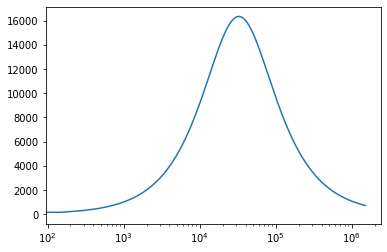

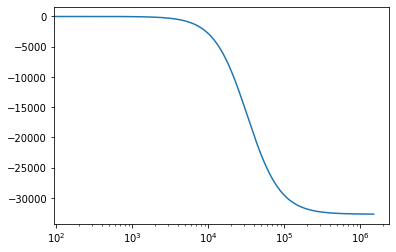

In [121]:
def Z(omega, R, C):
    z = R*(1/(1+1j*omega*R*C))
    return z

#note to self: make these graphs look better and inform more

OmegaTheory = np.linspace(0,1500000, 10000)
zTheory = Z(510, OmegaTheory, 6e-8)
realZtheory = [i.real for i in zTheory]
imagZtheory = [i.imag for i in zTheory]

plt.semilogx(OmegaTheory, realZtheory)
plt.show()
plt.semilogx(OmegaTheory, imagZtheory)
plt.show()

As can be seen in the figures above and through analysis of the real and imaginary equations for impedence the real part of, $\hat{Z}$ approaches the resistance, set at 510 ohms for the figure, as angular frequency approaches zero. In the imaginary part analysis further reveals that the imaginary part also approaches zero as angular frequency approaches zero. This implies that the RC circuit behaves more like a resistor at low frequencies. As angular frequency, $\omega$, approaches infinity the real and imaginary part of the impedence aproaches 0 meaning that the model shows that at high frequencies the RC circuit behaves more like a capacitor.

## 2 Experiment

This section will cover the experimental setup and the measuring principle used to calculate impedence from our experimental setup. This section will also highlight the results obtained in said experiment. The experiment is designed to confirm the above theory, showing that a RC circuit in parallel is infact a good model for a visco elastic material.

### Setup and measuring principle

The prefabricated circuit we used for our experiment was designed to fit various components for testing. The design we used is shown in the figure below.

![](Circuit%20diagram.png)

As seen in the above figure the outputs $\hat{U}$ and $\hat{V}$ are the voltage drops over the entire circuit and the entire circuit excluding the measured component, the RC circuit, respectively. Therefore the voltage drop over the measured component is $\hat{U}-\hat{V}$. Since the current is unknown in the measuring component we must find it using the current over the known resistor, this works because the measured component and the known resistor are connected in series therefore the current remains the same accross both. From the equations for impedence above we know that the impedence of a resistor is the resistance and therefore the current can be found from the basic Ohm's law, $\hat{V} = IR$. Plugging this into the equation for impedence above we get.

$$\hat{Z} = \frac{\hat{U}-\hat{V}}{\frac{\hat{V}}{R}} = (\frac{\hat{U}}{\hat{V}}-1)R$$
$$\hat{Z} = (\frac{U_0}{V_0}e^{i\phi_{U-V}}-1)R$$

This equation allows us to find the impedence of any component for our measuring device based on the information that we recieve namely voltage amplitude and phase difference. This works only if $\hat{U}$ is considerably larger than $\hat{V}$ because otherwise the known resistor will dominate the circuit, to ensure this a variable resistor is used for the known resistor. Using this information an experiment was conducted on a RC circuit where an oscillating signal was introduced ranging in frequency from 10Hz to 200KHz, the results are displayed below.

In [122]:
data = pd.read_csv("exdat1.csv", sep=';')
print(data)

      U0     V0  Deltaphi  Raux       f
0   9.36  1.540     -0.20   100      10
1   9.37  1.540     -0.30   100      20
2   9.35  1.540     -0.16   100      50
3   9.37  1.540     -1.10   100     100
4   9.37  1.540     -2.25   100     200
5   9.37  1.550     -5.21   100     500
6   9.29  1.560    -10.30   100    1000
7   9.23  1.660    -19.10   100    2000
8   9.13  2.190    -36.30   100    5000
9   8.82  1.850    -53.30    50   10000
10  8.19  1.360    -67.40    20   20000
11  6.11  1.280    -75.90    10   50000
12  3.79  0.893    -88.20     5  100000
13  1.72  0.557   -139.00     1  200000


## 3 Analysis
The analysis of the data obtained will show the measured data, a fit of the maxwell model on that data, and the uncertainty range present due to the resistor.

### 3.1 Impedence and Modulus
From the previous section we have an equation to determine the impedence of our measured component.

$$ Z = (\frac{U_0}{V_0}e^{i\phi_{U-V}} - 1)R_{aux} $$

We also know that the relationship between the Impedence and Modulus, $\hat{G}$ is,

$$\hat{G} = i \omega Z$$

Rewriting these equations in python we create a function with inputs of the two voltage drops the phase difference and the known resistor and a function to find the modulus given an impedence.

In [123]:
def FindZ(U, V, phi, Res):
    z = (U / V * np.exp(1j * np.radians(phi)) - 1) * Res
    return z

def giveG(z, omega):
    return 1j*omega*z

Then to determine the impedence, we apply the function to our dataset, printing to confirm. $\omega$ is also found here for later use and to find a resistor and capcitor value that best fits our data. The resistor measured was also given at 510 ohms with a certainty of $\pm 1\%$ therefore that range will be plotted aswell in all figures below. The given capacitor was labeled as 150 nF yet previous experiments showed it to be in the range of 60-70 nF, therefore the fit value of 68 nF will be used for our uncertainty range.

In [124]:
#finding Impedence and Modulus of our data


Impedence = FindZ(data['U0'], data['V0'], data['Deltaphi'], data['Raux'])
Omega = data['f']*2*np.pi
Modulus = giveG(Impedence, Omega)
#print(Impedence)
#print(Modulus)


#finding theoretical fit Impedence and Modulus
pop, cov = curve_fit(Z, Omega, Impedence)
Zfit = Z(OmegaTheory, pop[0], pop[1]) #pop[0] is the resistance and pop[1] is the capacitance in our component
Gfit = giveG(Zfit, OmegaTheory)

#finding Impedence and modulus based on uncertainty range due to resistor
ZuncertainHigh = Z(OmegaTheory, 510*1.01, pop[1])
GuncertainHigh = giveG(ZuncertainHigh, OmegaTheory)
ZuncertainLow = Z(OmegaTheory, 510 * 0.99, pop[1])
GuncertainLow = giveG(ZuncertainLow, OmegaTheory)

c:\Users\MS-Surface\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\series.py:857: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(self._values, dtype)


Next the norm and phase are calculated. Usually the following equations would be used to calculate this,

$$ |Z| = \sqrt{\Re(Z)^2 + \Im(Z)^2}$$ 

$$ \phi_Z = \tan^{-1}(\frac{\Im(Z)}{\Re(Z)}) $$


However the cmath package allows us to directly transform complex numbers into polar coordinates. Therefore the norm and phase can be extracted directly from these coordinates. This is also done for the theoretical values calculated by fitting above.

In [125]:
def Findnorm(z):
    polarz = cmath.polar(z)
    norm = polarz[0]
    return norm

def Findphase(z):
    polarz = cmath.polar(z)
    phase = polarz[1]
    return phase

In [126]:
Znorm = [Findnorm(i) for i in Impedence]
Zphase = [Findphase(i) for i in Impedence]
Zfitnorm = [Findnorm(i) for i in Zfit]
zfitphase = [Findphase(i) for i in Zfit]

Gnorm = [Findnorm(i) for i in Modulus]
Gphase = [Findphase(i) for i in Modulus]
Gfitnorm = [Findnorm(i) for i in Gfit]
Gfitphase = [Findphase(i) for i in Gfit]

ZuncertainHigh_norm = [Findnorm(i) for i in ZuncertainHigh]
ZuncertainLow_norm = [Findnorm(i) for i in ZuncertainLow]
ZuncertainHigh_phase = [Findphase(i) for i in ZuncertainHigh]
ZuncertainLow_phase = [Findphase(i) for i in ZuncertainLow]

GuncertainHigh_norm = [Findnorm(i) for i in GuncertainHigh]
GuncertainLow_norm = [Findnorm(i) for i in GuncertainLow]
GuncertainHigh_phase = [Findphase(i) for i in GuncertainHigh]
GuncertainLow_phase = [Findphase(i) for i in GuncertainLow]

The real and imaginary parts can also be extracted using numpy's real typecheck. This can also be done as described in the theory section numerically.

In [127]:
Zreal = [z.real for z in Impedence]
Zim = [z.imag for z in Impedence]
Zfitreal = [z.real for z in Zfit]
zfitim = [z.imag for z in Zfit]

Greal = [g.real for g in Modulus]
Gim = [g.imag for g in Modulus]
Gfitreal = [g.real for g in Gfit]
Gfitim = [g.imag for g in Gfit]

ZuncertainHigh_real = [z.real for z in ZuncertainHigh]
ZuncertainLow_real = [z.real for z in ZuncertainLow]
ZuncertainHigh_Imaginary = [z.imag for z in ZuncertainHigh]
ZuncertainLow_Imaginary = [z.imag for z in ZuncertainLow]

GuncertainHigh_real = [g.real for g in GuncertainHigh]
GuncertainLow_real = [g.real for g in GuncertainLow]
GuncertainHigh_Imaginary = [g.imag for g in GuncertainHigh]
GuncertainLow_Imaginary = [g.imag for g in GuncertainLow]


### 3.2 Figures
Matplotlib.pyplot is finally used to plot the processed data. First the norm is plotted against the log of the angular frequency $ \omega $ The fit of the theoretical function is plotted as a orange line while the measured values are shown as blue dots. Then the modulus, $\hat{G}$, is plotted along with the theoretical values with the same color scheme.

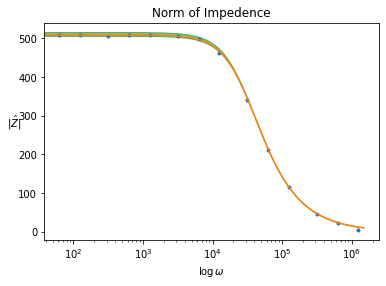

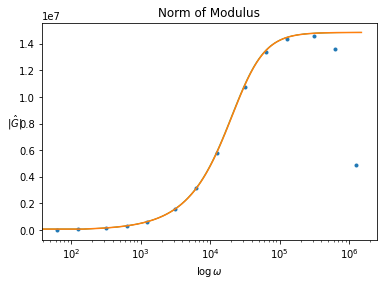

In [128]:
plt.semilogx(Omega, Znorm, '.')    #Impedence
plt.semilogx(OmegaTheory, Zfitnorm)
plt.fill_between(OmegaTheory, ZuncertainHigh_norm, ZuncertainLow_norm, color = 'Green', alpha = 0.5)
plt.title('Norm of Impedence')
plt.xlabel(r'$\log{\omega}$')
plt.ylabel(r'$|\hat{Z}|$', rotation = 0)
plt.show()

plt.semilogx(Omega, Gnorm, '.')    #Modulus
plt.semilogx(OmegaTheory, Gfitnorm)
plt.fill_between(OmegaTheory, GuncertainHigh_norm, GuncertainLow_norm, color= 'Green', alpha = 0.5)
plt.title('Norm of Modulus')
plt.xlabel(r'$\log{\omega}$')
plt.ylabel(r'$|\hat{G}|$', rotation = 0)
plt.show()

In the figures above we see the norm of the Impedence and Modulus respectively. The Impedence shows that the model fits our data pretty well however the data at the norm of the modulus drops off at higher frequencies. This will be discussed below in the uncertainties section.

Next the phase is plotted as a semilog plot against the angular frequency.

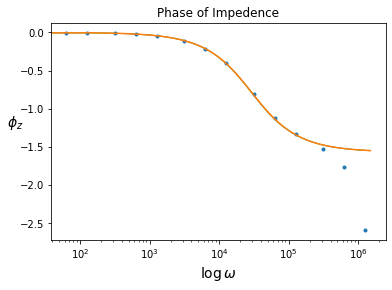

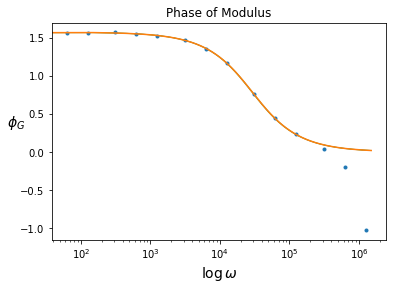

In [129]:
plt.semilogx(Omega, Zphase, '.')
plt.semilogx(OmegaTheory, zfitphase)
plt.fill_between(OmegaTheory, ZuncertainHigh_phase, ZuncertainLow_phase, color = 'green', alpha = 0.5)
plt.title("Phase of Impedence")
plt.xlabel(r'$\log\omega$', size = 14)
plt.ylabel(r'$\phi_z$', rotation = 0, size = 14)
plt.show()

plt.semilogx(Omega, Gphase, '.')
plt.semilogx(OmegaTheory, Gfitphase)
plt.fill_between(OmegaTheory, GuncertainHigh_phase, GuncertainLow_phase, color = 'green', alpha = 0.5)
plt.title("Phase of Modulus")
plt.xlabel(r'$\log\omega$', size = 14)
plt.ylabel(r'$\phi_G$', rotation = 0, size = 14)
plt.show()

Because the Impedence and Modulus are complex the real and imaginary parts must be plotted seperately.

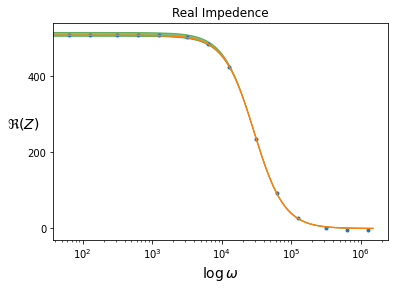

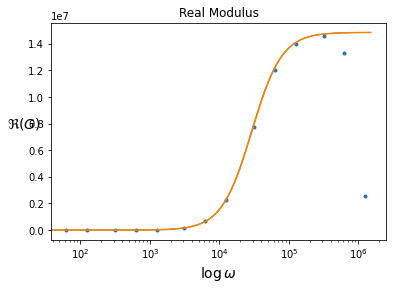

In [130]:
plt.semilogx(Omega, Zreal, '.')
plt.semilogx(OmegaTheory, Zfitreal)
plt.fill_between(OmegaTheory, ZuncertainHigh_real, ZuncertainLow_real, color = 'green', alpha = 0.5)
plt.title('Real Impedence')
plt.xlabel(r'$\log\omega$', size = 14)
plt.ylabel(r'$\Re(Z)$', rotation = 0, size = 14)
plt.yticks(np.arange(0, 600, step = 200))
plt.show()

plt.semilogx(Omega, Greal, '.')
plt.semilogx(OmegaTheory, Gfitreal)
plt.fill_between(OmegaTheory, GuncertainHigh_real, GuncertainLow_real, color = 'green', alpha = 0.5)
plt.title('Real Modulus')
plt.xlabel(r'$\log\omega$', size = 14)
plt.ylabel(r'$\Re(G)$', rotation = 0, size = 14)
#plt.yticks(np.arange(0, 1e7))
plt.show()

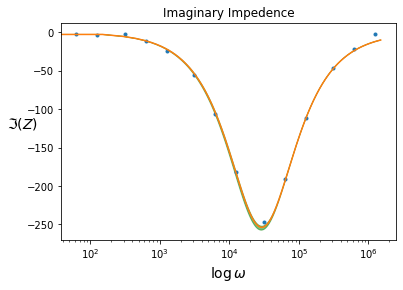

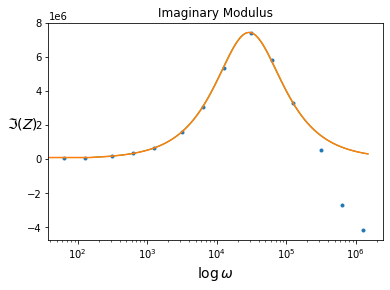

In [131]:
plt.semilogx(Omega, Zim, '.')
plt.semilogx(OmegaTheory, zfitim)
plt.fill_between(OmegaTheory, ZuncertainLow_Imaginary, ZuncertainHigh_Imaginary, color = 'green', alpha = 0.5)
plt.title('Imaginary Impedence')
plt.xlabel(r'$\log\omega$', size = 14)
plt.ylabel(r'$\Im(Z)$', rotation = 0, size = 14)
plt.show()

plt.semilogx(Omega, Gim, '.')
plt.semilogx(OmegaTheory, Gfitim)
plt.fill_between(OmegaTheory, GuncertainHigh_Imaginary, GuncertainLow_Imaginary, color = 'green', alpha = 0.5)
plt.title('Imaginary Modulus')
plt.xlabel(r'$\log\omega$', size = 14)
plt.ylabel(r'$\Im(Z)$', rotation = 0, size = 14)
plt.show()

### 3.3 Uncertainty in measurement

As seen in the above figures overall in the lower frequencies the model seems to fit the data well and falls within the range of uncertainty we set in the previous section. This is understandable as the fit resistance was about 507 ohms which falls within the range of $\pm 1\%$ of 510 ohms. However at high frequencies the plots of the modulus show that the data does not follow the expected trend this is due to our measurment setup. When $\hat{V}$ becomes close to $\hat{U}$ the Impedence of the component becomes very very small, due to memory constraints of modern digital tools at a certain decimal range these numerical tools tend to just round to 0. Therefore our measurments are dominated by the auxilary resistor. This becomes especially obvious when looking at the Modulus at higher frequencies. The norm of the modulus is expected to approach $\frac{1}{C}$ at high frequencies but due to our systematic error the auxilary resistor in the total system becomes dominant leading to our modulus crashing towards zero again. This is not as readily seen in the norm of Impedence as it is expected to be zero at high frequencies and to be equal to the resistor at low frequencies.

## 4 Discussion and Conclusion
### 4.1 Harmonic Vs. Step Oscillation

According to Krichoffs laws a system in parallel will experience the same voltage across components at any given time, $U_{total}(t) = U_1(t) = U_2 =...= U_N$, while the total current is equal to the sum of the components currents at any given time, $I_{Total}(t)= I_1(t)+I_2(t) +...+ I_N(t)$. For a resistor and capacitor in parallel the current would therefore be,

$$I_{Total}(t) = I_{C} + I_{R} \implies I_{Total} = C \frac{dU(t)}{dt} + \frac{1}{R}U(t)$$

When the charge changes harmonically this equation holds for our model. In the situation where the charge is being changed via a step input it can be thought of as a continuous current for a given period of time, therefore for that stretch of time $\frac{dQ}{dT} = 0$.
Plugging that in for current in the equation above gives,

$$0 = C \frac{dU(t)}{dt} + \frac{1}{R}U(t) \implies -\frac{1}{RC} = \frac{1}{U(t)}\frac{dU(t)}{dt}$$
$$\implies \int_0^t -\frac{1}{RC} dt = \int_{U(0)}^{U(t)} \frac{1}{U(t)} dU(t)$$
$$\implies U(t) = U_0 e^{-\frac{t}{RC}}$$

This shows that given some initial voltage, said voltage would dissipate over time exponentially.

### 4.2 Conclusion
This report has shown that the analogous electrical circuit to the Mechanical model for a viscoeleastic material provides an analogous description of the behavior of these materials. Analogous models like this can help us understand materials by having a more controllable experiment than a mechanical one while providing information on the dynamics of the system anyway. The same principles applied to viscoeleastic materials in this report can be used to discuss many more types of materials or mechanical systems, leading to a powerful tool to understand the material world.